In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv("cp_new_reg1.csv")
# del df['l2_rqsts.code_rd_miss']
# del df['LLC-load-misses']
# del df['cache-misses']
#del df['branch-misses','iTLB-load-misses','L1-icache-load-misses','LLC-load-misses','LLC-store-misses']
# del df['cache-misses']
# del df['LLC-load-misses']

In [3]:
# del df['l2_rqsts.all_demand_miss']
# del df['l2_rqsts.demand_data_rd_miss']
# del df['cache-misses']
# del df['LLC-load-misses']
# del df['dTLB-load-misses']

# del df['branch-misses']
# del df['iTLB-load-misses']
# del df['dTLB-store-misses']
# del df['LLC-store-misses']

# del df['branch-load-misses']

In [4]:
df.head()


df

,branch-load-misses,branch-misses,iTLB-load-misses,dTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,L1-dcache-load-misses,l1d_pend_miss.pending_cycles,l2_rqsts.code_rd_miss,l2_rqsts.all_demand_miss,l2_rqsts.demand_data_rd_miss,l1d_pend_miss.pending_cycles.1,l2_rqsts.code_rd_miss.1,l2_rqsts.rfo_miss,cache-misses,LLC-store-misses,LLC-load-misses,CPI
0,7874,8631,276,624,167252,14603,33152267,16175544,13740,1858136,20161,12142891,13671,1728354,5127449,825291,24086,2.09
1,10434,7664,252,600,143698,15129,27984031,27159819,15309,1010889,16380,30821070,13347,1233963,5274946,1137493,23664,1.58
2,5312,2844,200,608,161556,16133,31435948,13392822,15196,1222226,16607,34925679,13489,1325543,6167401,1277132,18456,1.43
3,804,959,241,457,160718,15577,32512429,18962941,13885,1769453,20244,36752753,15084,1321124,5734393,1186262,11177,1.60
4,969,2576,251,657,133119,19445,32666533,14990739,14557,1837555,18859,14021870,14811,1722248,5425753,1003391,24140,1.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,712,787,200,636,165594,15206,28168384,32040930,15729,1547829,22068,21342927,20310,1268792,5430335,1074733,10124,1.31
1260,3061,6230,226,764,165672,13850,33097953,12360410,15838,1865578,18307,12489320,12552,1677937,5310669,1033064,23494,1.41
1261,13988,12936,186,668,163392,19003,32819952,10329977,14783,1891855,19852,15941084,13650,1836838,5577032,1012702,31798,1.61
1262,1337,1362,191,759,145568,15912,32488114,16978634,14037,1979659,22201,15176439,15036,1863811,5558491,999471,14284,1.87


In [5]:
scaler = StandardScaler()


In [6]:
df.shape

(1264, 18)

In [7]:
print(df.corr())

                                branch-load-misses  branch-misses  \
branch-load-misses                        1.000000       0.933913   
branch-misses                             0.933913       1.000000   
iTLB-load-misses                          0.312942       0.283459   
dTLB-load-misses                          0.208068       0.275364   
dTLB-store-misses                        -0.153128      -0.180844   
L1-icache-load-misses                     0.105447       0.149443   
L1-dcache-load-misses                    -0.090590      -0.087633   
l1d_pend_miss.pending_cycles             -0.035248      -0.010764   
l2_rqsts.code_rd_miss                    -0.017564       0.005413   
l2_rqsts.all_demand_miss                 -0.106841      -0.103262   
l2_rqsts.demand_data_rd_miss             -0.321001      -0.326470   
l1d_pend_miss.pending_cycles.1           -0.062449      -0.078437   
l2_rqsts.code_rd_miss.1                   0.028921       0.049626   
l2_rqsts.rfo_miss                 

In [8]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count         1264.000000    1264.000000       1264.000000       1264.000000   
mean          4918.604430    4908.960443        212.939082        717.733386   
std           6557.768442    6286.095985         59.875341        128.620740   
min            558.000000     543.000000          0.000000        452.000000   
25%            859.000000     864.000000        185.000000        647.750000   
50%           2244.000000    2124.500000        210.000000        701.500000   
75%           8144.000000    8256.500000        240.250000        756.000000   
max          75887.000000   72198.000000        608.000000       1540.000000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count        1264.000000            1264.000000           1.264000e+03   
mean       141812.506329           15938.423259           2.836517e+07   
std         22240.648921            4412.171138          

In [9]:
li=['branch-load-misses', 'branch-misses', 'iTLB-load-misses', 'L1-icache-load-misses', 'l2_rqsts.code_rd_miss', 'l2_rqsts.demand_data_rd_miss', 'l2_rqsts.rfo_miss']

In [10]:
X = df[li]

y = df['CPI']

In [11]:
# scaler = StandardScaler()
# X=scaler.fit_transform(X)

In [12]:
from sklearn.preprocessing import minmax_scale
X=minmax_scale(X)
y = minmax_scale(y)



In [13]:
y
#sns.distplot(df['CPI']);

array([0.96938776, 0.44897959, 0.29591837, ..., 0.47959184, 0.74489796,
       0.91836735])

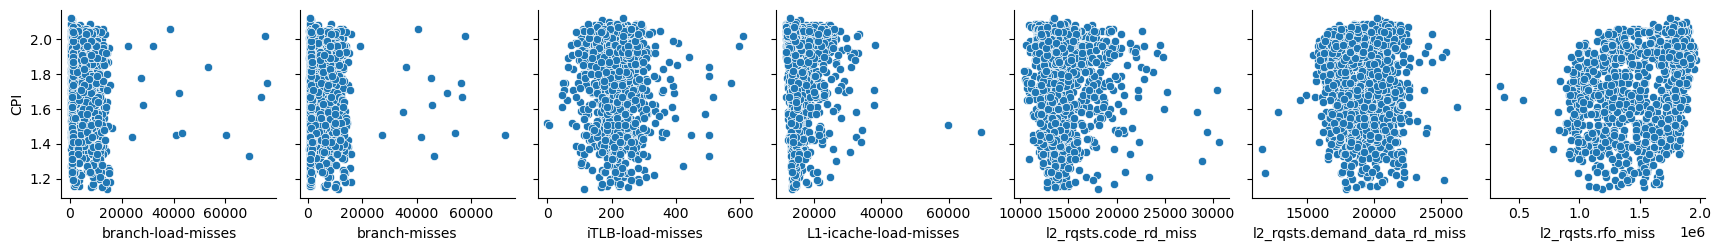

In [14]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

<Axes: >

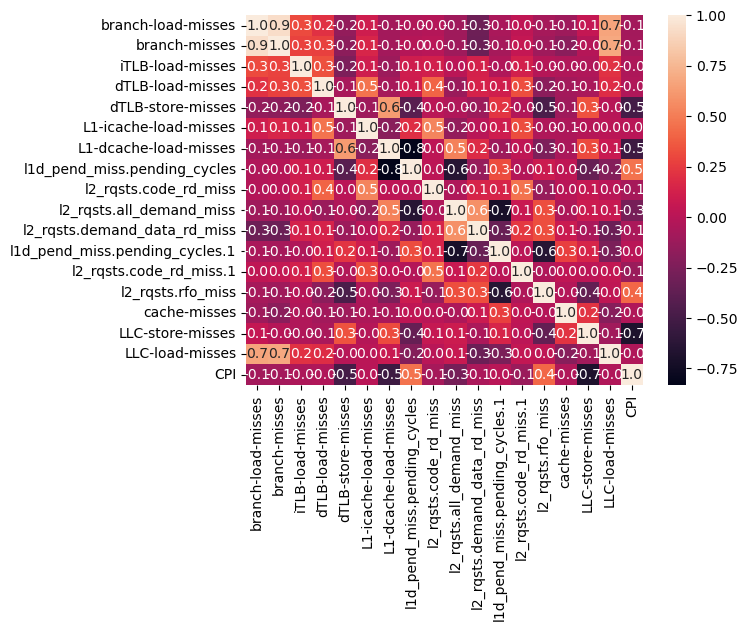

In [15]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [17]:
y_train.shape

(1011,)

In [18]:
y_test.shape

(253,)

In [19]:
reg_model = linear_model.LinearRegression()

In [20]:
#Fitting the Multiple Linear Regression model
# reg_model = LinearRegression().fit(X_train, y_train)
# print(f"Linear Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [21]:
# from sklearn.linear_model import Ridge
# reg_model = Ridge(alpha=0.9).fit(X_train, y_train)
# print(f"Ridge Regression-Training set score: {reg_model.score(X_train, y_train):.2f}")
# print(f"Ridge Regression-Test set score: {reg_model.score(X_test, y_test):.2f}")

In [22]:

# reg_model=LinearRegression(positive= True)
reg_model.fit(X_train,y_train)


LinearRegression()

In [23]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  0.4138910897304077


[(array([0.09712063, 0.11287419, 0.45394737, 0.05106632, 0.16613134,
         0.58428503, 0.85482389]),
  -0.5644023576135356),
 (array([0.13110489, 0.09937897, 0.41447368, 0.06013482, 0.2436626 ,
         0.32571976, 0.55001455]),
  0.2242693488318181),
 (array([0.06310982, 0.0321122 , 0.32894737, 0.07744427, 0.23807877,
         0.34124325, 0.60647682]),
  0.05917079147948326),
 (array([0.00326567, 0.0058056 , 0.39638158, 0.06785856, 0.17329644,
         0.58996102, 0.60375236]),
  0.11704894206891296),
 (array([0.00545607, 0.02837206, 0.41282895, 0.13454476, 0.20650294,
         0.49524721, 0.85105933]),
  0.0770582972149371),
 (array([0.12047153, 0.14904752, 0.30427632, 0.1690085 , 0.1645995 ,
         0.45113862, 0.86593755]),
  -0.5917487952724312),
 (array([0.07400868, 0.05437164, 0.40460526, 0.11818354, 0.1505658 ,
         0.58578951, 0.94838862]),
  0.673120202225398)]

In [24]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [25]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [0.62029604 0.47806986 0.55297164 0.56027607 0.79574956 0.80550215
 0.47191817 0.57122353 0.65191537 0.75246924 0.83062722 0.60182311
 0.74683028 0.74961208 0.66372961 0.58129334 0.55105625 0.44839478
 0.5260705  0.74588652 0.69041903 0.43558952 0.67781296 0.53595657
 0.72662762 0.66314699 0.67214946 0.66858299 0.53760429 0.74793077
 0.76986354 0.71675467 0.62416875 0.6993836  0.62858697 0.58747892
 0.47243326 0.70288234 0.71865687 0.79294551 0.50794884 0.73380633
 0.47407711 0.7509362  0.62362518 0.45310719 0.88860821 0.61136221
 0.41768619 0.65039894 0.51714788 0.63118851 0.66248112 0.54343557
 0.73234013 0.75237635 0.59316651 0.79522175 0.46798531 0.84164398
 0.66845123 0.66506454 0.65056929 0.7784719  0.42570037 0.72582781
 0.56865949 0.47868798 0.7548923  0.68665072 0.5628327  0.6306717
 0.41551615 0.71029569 0.54604563 0.7151773  0.47411225 0.51239555
 0.58479491 0.77133571 0.49199855 0.76122427 0.76853826 0.44820976
 0.65920513 0.81751173 0.64964857 0.65

In [26]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred , '  Residue': y_test-y_pred})


In [27]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)

print()
print()
mae = metrics.mean_absolute_error(y_train, x_pred)
mse = metrics.mean_squared_error(y_train, x_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_train, x_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
# print('Adjusted R^2 value : ' , adjusted_r^2)


Mean Absolute Error: 0.18615540129998606
Mean Square Error: 0.05114550633190483
Root Mean Square Error: 0.22615372279028445
R^2 value : 0.2297182306510539
F-ststistic value :  4.421771119493417


Mean Absolute Error: 0.17688395231397147
Mean Square Error: 0.046861367295104074
Root Mean Square Error: 0.21647486527332468
R^2 value : 0.2297182306510539


In [28]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.22542525900659316

In [29]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

const    8.653567e-22
x1       8.362675e-03
x2       3.007014e-01
x3       4.255579e-01
x4       2.888821e-01
x5       2.652991e-01
x6       2.010755e-17
x7       4.783272e-60
Name: P>|t|, dtype: float64

In [30]:
# import itertools


# all_columns = li;

# num_columns_to_select = 7


# column_combinations = list(itertools.combinations(all_columns, num_columns_to_select))

# # column_combinations
# for combination in column_combinations:
#     X=df[list(combination)]
#     y = df['CPI']
#     from sklearn.preprocessing import minmax_scale
#     X=minmax_scale(X)
#     y=minmax_scale(y)
#     X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
#     reg_model = linear_model.LinearRegression()
#     reg_model.fit(X_train,y_train)
#     count=0
#     flag=0
#     for j in  reg_model.coef_:
#         if j>=0:
#             count+=1
#     if count==5:
#         print(combination)
